In [1]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
from utils.config import random_sample,seed

In [2]:
import os
import pandas as pd

In [3]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type = "top2vec"
model_name = "Top2Vec"
experiment="embedding"
embedding_model = "all-miniLM-L12-v2"
data_type="np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"

folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


df = load_from_file(folder_path_data,file_name_data)



data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
df

,text,label,date
0,representanten harald tom nesvik bad ordet nat...,1,2009-06-03
1,selvfølgelig diskusjon timer saken konstatere ...,1,2011-02-16
2,takk svaret svar linjene senterpartiets progra...,0,2007-03-21
3,riktig alternative statsbudsjetter prinsipale ...,0,2004-10-26
4,dagens dagsavisen stortingsrepresentant astrid...,0,2000-11-15
...,...,...,...
3595,slutte representanten tone merete sønsterud fo...,1,2010-06-14
3596,oppfølgingsspørsmål landbruksministeren utanri...,1,2004-03-10
3597,tillater stille statsråden følgende spørsmål s...,0,2009-10-21
3598,fnorganisasjonene indikasjon norge regne øknin...,1,2006-10-05


In [5]:
topic_model = None
try:
    topic_model = Top2Vec.load(file_path)
except:
    print("success")
    topic_model = Top2Vec(documents = new_data, embedding_model="all-miniLM-L12-v2")

In [6]:
topic_model.save(file_path)

In [7]:
print(topic_model.embedding_model)

all-miniLM-L12-v2


In [8]:
num_topics = topic_model.get_num_topics()
print(num_topics)

26


In [9]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [10]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [11]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [12]:
topic_model.get_topics()

(array([['selvfølgelig', 'spørsmalet', 'saksordføreren', ..., 'høgre',
         'høst', 'læring'],
        ['selvfølgelig', 'spørsmalet', 'avgjørende', ..., 'spørre',
         'høgre', 'ønsker'],
        ['selvfølgelig', 'representerer', 'spørsmalet', ..., 'ønsket',
         'forsøk', 'skjønner'],
        ...,
        ['transportplan', 'selvfølgelig', 'løft', ..., 'kjøper',
         'rødgrønne', 'medføre'],
        ['presidenten', 'president', 'selvfølgelig', ..., 'hørt',
         'skjønner', 'hører'],
        ['selvfølgelig', 'spørsmalet', 'spørsmal', ..., 'lærere',
         'prosjektet', 'ført']], dtype='<U15'),
 array([[0.6569371 , 0.63017315, 0.5918647 , ..., 0.49613816, 0.4956991 ,
         0.495516  ],
        [0.5332254 , 0.5269288 , 0.49467647, ..., 0.41047066, 0.40898418,
         0.40852925],
        [0.56685615, 0.5375841 , 0.5276574 , ..., 0.41857705, 0.41755944,
         0.41689336],
        ...,
        [0.54278165, 0.51087356, 0.45903218, ..., 0.38740212, 0.38670444,
   

In [13]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'selvfølgelig': 0.6569371, 'spørsmalet': 0.63017315, 'saksordføreren': 0.5918647, 'løsningen': 0.57983106, 'spørsmal': 0.57563215, 'avgjørende': 0.5731232, 'kjøpe': 0.5694847, 'gjennomføre': 0.56557155, 'løsning': 0.5644591, 'spør': 0.56048715, 'eøsavtalen': 0.5576137, 'oppfølging': 0.553926, 'gjennomført': 0.55313903, 'medføre': 0.5520543, 'utgjør': 0.5509039, 'gjennomføres': 0.5499072, 'spørsmalene': 0.54818803, 'prøve': 0.5464947, 'kjøre': 0.5448963, 'kjøper': 0.5418396, 'sjølvsagt': 0.5406492, 'forsøk': 0.5401145, 'løse': 0.5344959, 'tilnærming': 0.5344157, 'løsninger': 0.5314667, 'unødvendig': 0.5305023, 'høring': 0.5256364, 'nødvendig': 0.52528054, 'støtte': 0.52501047, 'prøver': 0.5245105, 'høre': 0.52327484, 'medfører': 0.5216137, 'støtter': 0.5197331, 'ført': 0.51846313, 'lønning': 0.51420873, 'lære': 0.512782, 'søke': 0.5125792, 'raudgrøne': 0.51247334, 'løfte': 0.51080525, 'skjønner': 0.5072248, 'fører': 0.5056916, 'økonomiske': 0.5052208, 'rødgrønne': 0.5028671, 'følge

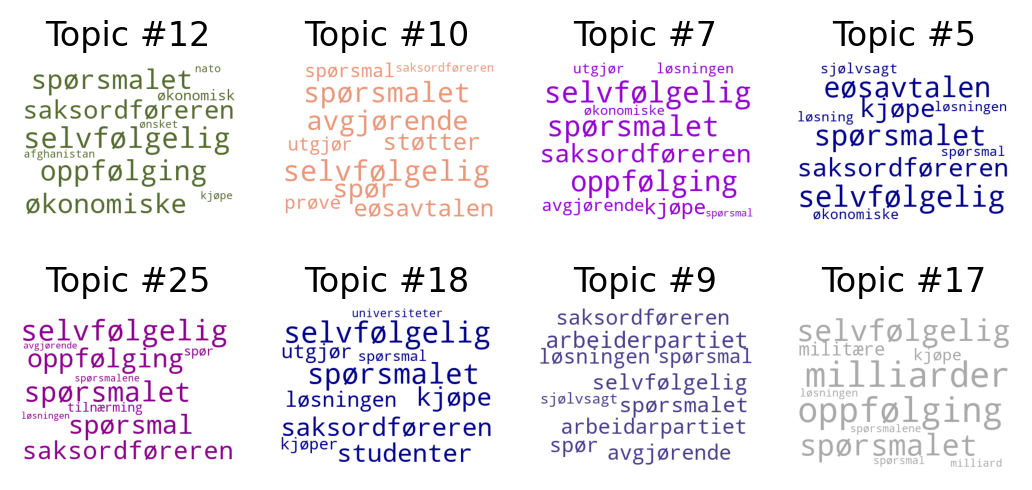

In [14]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores,num_topics,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

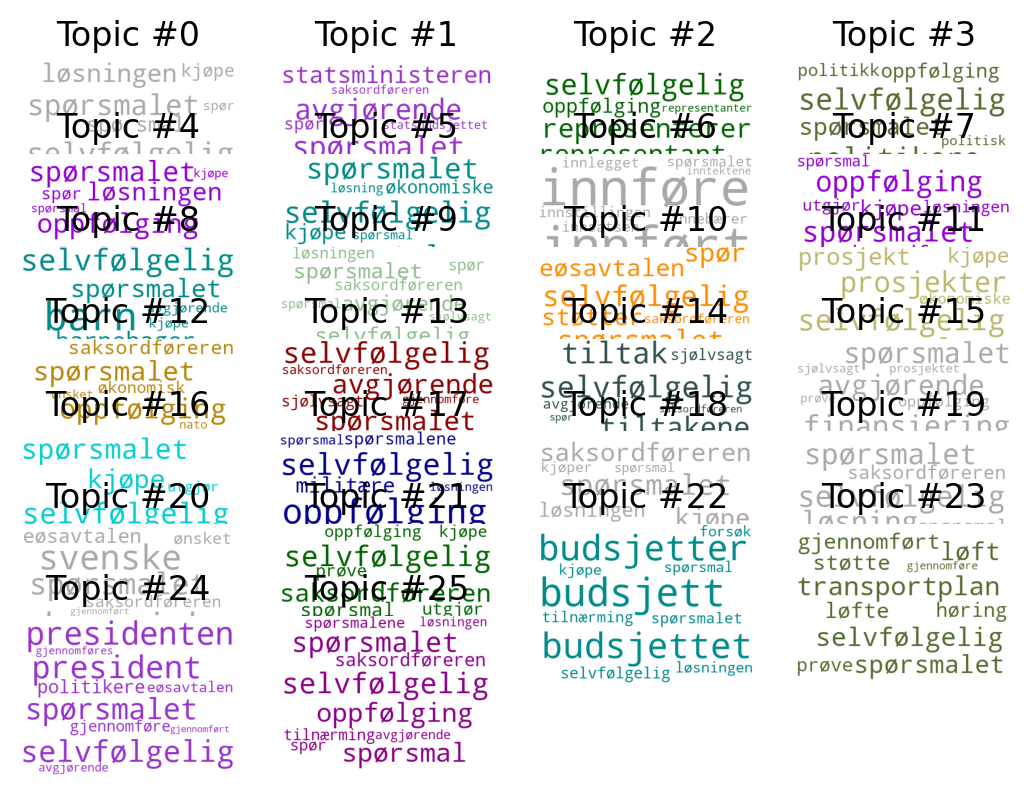

In [15]:


from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [16]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [17]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]



write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [18]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)

In [19]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [20]:
len(loaded_topics.values())

26

In [21]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [22]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [23]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('selvfølgelig', 'spørsmalet') wordtuple
('saksordføreren', 'selvfølgelig') wordtuple
('saksordføreren', 'selvfølgelig') wordup
29.0 over
50270.0 under
-10.759429073455157 -4.857980995127573 2.214794393853451 ('saksordføreren', 'selvfølgelig') 29 457 110
('løsningen', 'selvfølgelig') wordtuple
('løsningen', 'selvfølgelig') wordup
16.0 over
31076.0 under
-10.92351319630841 -4.0 2.7308782990771023 ('løsningen', 'selvfølgelig') 16 457 68
('selvfølgelig', 'spørsmal') wordtuple
('avgjørende', 'selvfølgelig') wordtuple
('avgjørende', 'selvfølgelig') wordup
40.0 over
85916.0 under
-11.068711111848344 -5.321928094887363 2.0798310150942787 ('avgjørende', 'selvfølgelig') 40 457 188
('kjøpe', 'selvfølgelig') wordtuple
('kjøpe', 'selvfølgelig') wordup
15.0 over
58039.0 under
-11.917844446221718 -3.9068905956085187 3.05046792444554 ('kjøpe', 'selvfølgelig') 15 457 127
('gjennomføre', 'selvfølgelig') wordtuple
('gjennomføre', 'selvfølgelig') wordup
37.0 over
79518.0 under
-11.069540485277848 -5.2

In [24]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.31280247141529033


In [25]:
diversity

0.3192307692307692

In [26]:
coherence

1.7870581515191357

In [27]:
from tabulate import tabulate
import csv

In [28]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═════════════════════════════════════════════╤═══════════╤══════════╕
│ Model                                       │ Metric    │    Value │
╞═════════════════════════════════════════════╪═══════════╪══════════╡
│ top2vec_all-miniLM-L12-v2_np_mini_stopwords │ coherence │ 1.78706  │
├─────────────────────────────────────────────┼───────────┼──────────┤
│ top2vec_all-miniLM-L12-v2_np_mini_stopwords │ diversity │ 0.319231 │
╘═════════════════════════════════════════════╧═══════════╧══════════╛


In [29]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})